<a href="https://colab.research.google.com/github/Rogerio-mack/Analise-de-Dados/blob/main/EDA_T9_Quantidades_e_Relacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Prof. Orlando">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Quantidades e Relações dos Dados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore") 

# Gráfico de barra

O gráfico de barras é usado, principalmente, para realizar comparações entre as categorias de uma variável qualitativa ou quantitativa discreta. As barras deste gráfico podem ser plotadas verticalmente ou horizontalmente. Quando analisadas as frequências das variáveis, as barras de cada categoria são proporcionais ao número de observações na respectiva classe.



### Opção 1 (Matplotlib)

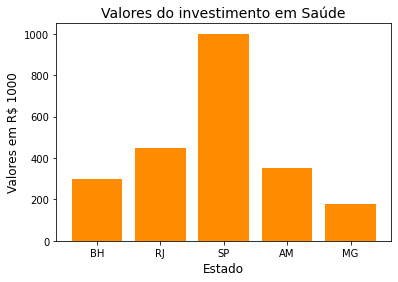

In [ ]:
#Investimento em saúde

plt.bar(['BH','RJ','SP','AM','MG'],[300,450,1000,350,180], color='darkorange') # plt.barh

plt.title('Valores do investimento em Saúde', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Valores em R$ 1000', fontsize=12)
plt.show()

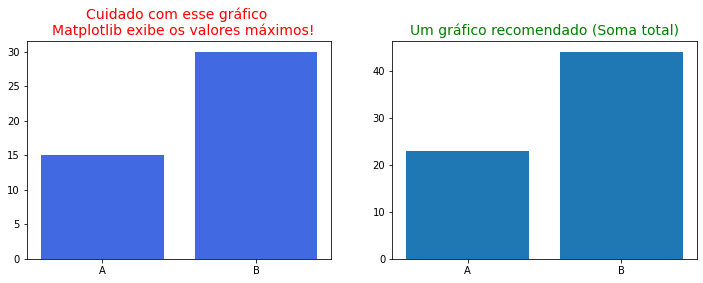

In [ ]:
df1=pd.DataFrame({'tipo':['A','A','B','B','B'],
                 'vendas':[15,8,10,30,4]})


plt.figure(figsize=(12,4))


plt.subplot(1,2,1)
plt.bar(df1.tipo, df1.vendas, color='royalblue')
plt.title('Cuidado com esse gráfico \n  Matplotlib exibe os valores máximos!', fontsize=14, color="r")
plt.xlabel('')
plt.ylabel('')


plt.subplot(1,2,2)
g=df1.groupby('tipo').vendas.sum() # Total(depende da análise)
plt.bar(g.keys(), g)
plt.title('Um gráfico recomendado (Soma total)', fontsize=14, color="g")
plt.ylabel(' ')

plt.show()

### Opção 2 (Seaborn)

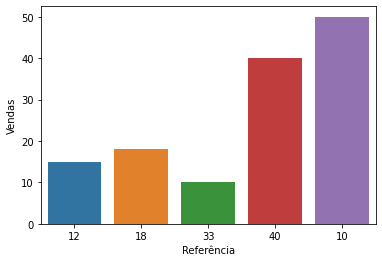

In [ ]:
df2=pd.DataFrame({'Referência':['12','18','33','40','10'],
                 'Vendas':[15,18,10,40,50]})

sns.barplot(x=df2.Referência,y=df2.Vendas)
plt.show()

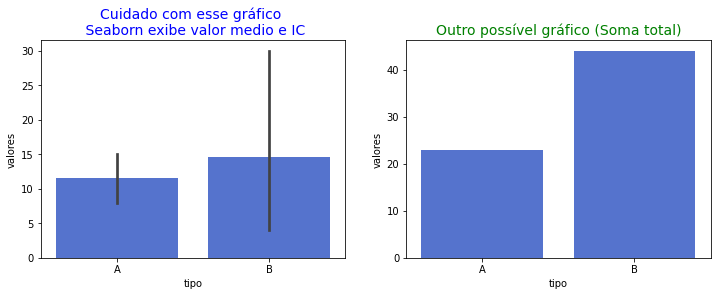

In [ ]:
df1=pd.DataFrame({'tipo':['A','A','B','B','B'],
                 'valores':[15,8,10,30,4]})

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.barplot(df1.tipo, df1.valores, color='royalblue', ci=95)
plt.title('Cuidado com esse gráfico \n Seaborn exibe valor medio e IC',fontsize=14, color="b")


plt.subplot(1,2,2)
sns.barplot(df1.tipo, df1.valores, color='royalblue', estimator=sum,ci=None)
plt.title('Outro possível gráfico (Soma total)', fontsize=14, color="g")
plt.show()


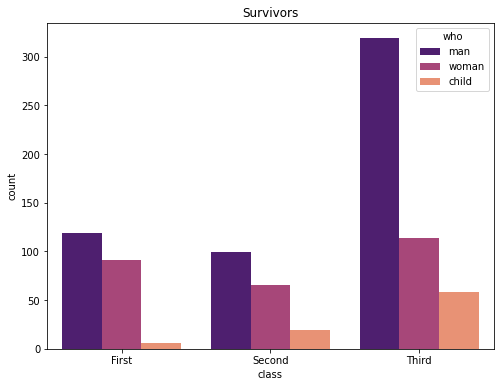

In [ ]:
#Countplot 

titanic = sns.load_dataset('titanic')

plt.figure(figsize=(8,6))
sns.countplot(x = 'class', hue = 'who', data = titanic, palette = 'magma')
plt.title('Survivors')
plt.show()

### Opção 3 (Groupby)

In [ ]:
import seaborn as sns
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


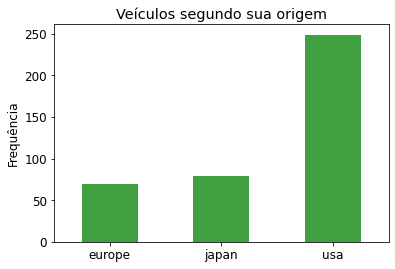

In [ ]:
df_o=df.groupby(df.origin)["mpg"].count()
df_o.plot(kind='bar', rot=0, color="green", alpha=0.75)


plt.xlabel("")
plt.ylabel("Frequência",fontsize='large')
plt.title("Veículos segundo sua origem",fontsize='x-large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.show()


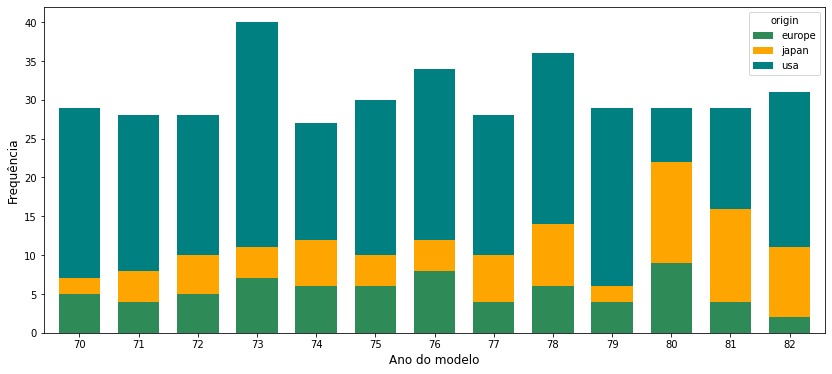

In [ ]:
df1=df.groupby(['model_year','origin'])["mpg"].count().unstack()
df1.plot(kind="bar", rot=0, width=0.7,figsize=[14,6], stacked=True, color=['seagreen', 'orange', 'teal'])

plt.xlabel("Ano do modelo",fontsize='large')
plt.ylabel("Frequência",fontsize='large')
plt.show()

#Gráfico de pizza

O gráfico de setores ou gráfico de pizza é um diagrama circular onde os valores de cada categoria são proporcionais às respectivas frequências. Para construir um gráfico tipo pizza é necessário determinar o ângulo dos setores circulares correspondentes à contribuição percentual de cada valor no total.

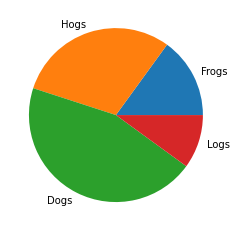

In [ ]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
plt.pie(sizes, labels=labels)
plt.show()

In [ ]:
#Salários de uma companhia

link= "http://www.orlandoalbarracin.com.br/phyton/data2.csv"
dfs=pd.read_csv(link)
dfs.head()

,id,Setor,Sexo,Grau_instrução,Idade,Anos_Experiencia,Estado,salario
0,1,Operacion,Masculino,Superior Completo,54,12,SP,2708.410161
1,2,RH,Masculino,Doutorado,52,12,SP,8321.204000
2,3,RH,Masculino,Mestrado,54,12,RJ,7588.139000
3,4,Financeiro,Feminino,Mestrado,32,9,BH,6512.599657
4,5,RH,Masculino,Superior Incompleto,34,8,BH,3125.765000


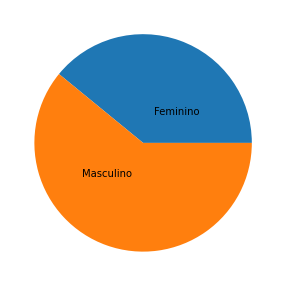

In [ ]:
df3=dfs.groupby("Sexo")["Sexo"].count()

plt.figure(figsize=(10,5))
plt.pie(df3,labels=df3.index, labeldistance=0.3)
plt.show()

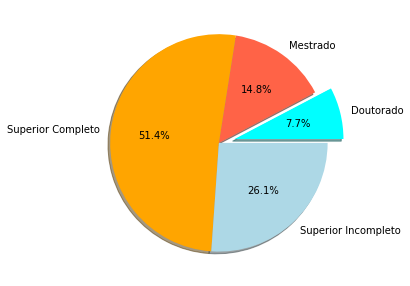

In [ ]:
df4=dfs.groupby("Grau_instrução")["Grau_instrução"].count()
plt.figure(figsize=(10,5))
plt.pie(df4,labels=df4.index, labeldistance=1.1, pctdistance=0.6, autopct='%1.1f%%',colors=['cyan','tomato', 'orange','lightblue'], explode = (0.15, 0,0,0),shadow=True)
plt.show()

# Scatter plots

É um gráfico útil para analisar a relação entre duas variáveis quantitativas uma de causa e uma de efeito.

In [ ]:
# Base de dados de veículos 
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


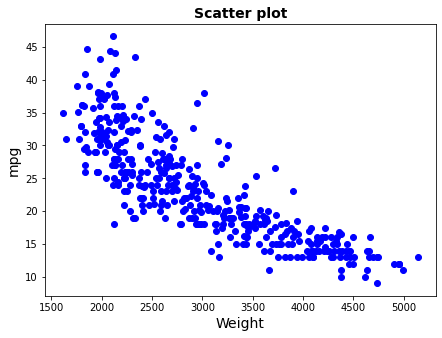

In [ ]:
# Há alguma relação entre o consumo (mpg- miles per gallon) e o peso do veículo (Weight) ?

plt.figure(figsize=(7,5))

plt.scatter(df.weight,df.mpg,c="blue")    
plt.title('Scatter plot', fontsize=14, weight='bold') 
plt.xlabel("Weight", fontsize=14)
plt.ylabel("mpg", fontsize=14)
plt.show()

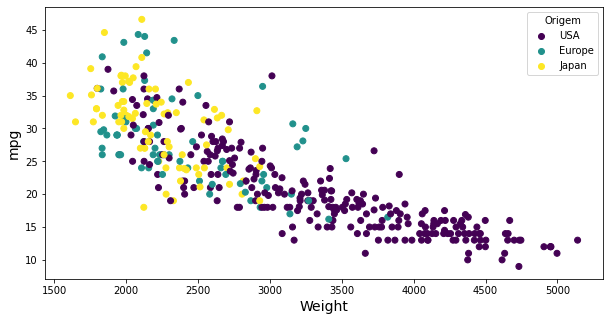

In [ ]:
# Há alguma relação entre o consumo (mpg- miles per gallon) e o peso do veículo (Weight) o pais de origem influência?

origem=df['origin'].replace(['usa', 'europe', 'japan'], value=[1, 2, 3] )

fig, ax = plt.subplots(figsize=(10,5))
g=ax.scatter(df.weight,df.mpg,c=origem)  

handles,_ =g.legend_elements( )
legend2 = ax.legend(handles, ["USA","Europe", "Japan"], loc="upper right", title="Origem")
plt.xlabel("Weight", fontsize=14)
plt.ylabel("mpg", fontsize=14)
plt.show()

### Usando Seaborn

[]

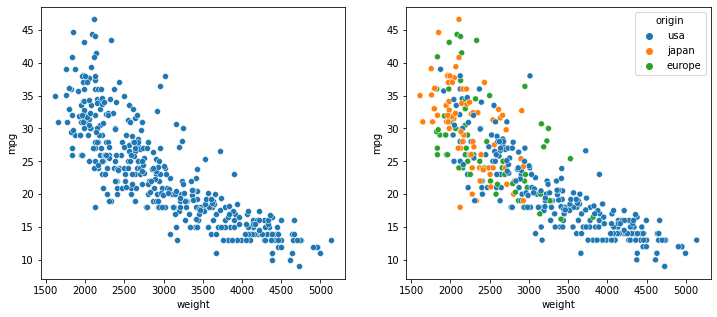

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(df.weight, df.mpg, data=df)

plt.subplot(1,2,2)
sns.scatterplot(df.weight, df.mpg, data=df, hue="origin")
plt.plot()

# Heatmaps

O termo *heat map* foi originado a partir de tecnologias que utilizam o calor do corpo humano para monitoramento de ambientes ou para realização de exames médicos. Esses mapas ajudam a compreender melhor a distribuição das variáveis de interesse.

In [ ]:
# Consumo de energia elétrica residencial no Brasil 

link="http://www.orlandoalbarracin.com.br/phyton/energiaR.xlsx"
dfe=pd.read_excel(link)
dfe.head()

,mês,ano,consumoRes,ConsumoTBA,ConsumoTSC
0,JAN,2019,12.971020,2.032130,2.055710
1,FEV,2019,12.668477,1.962083,2.236666
2,MAR,2019,12.425542,2.070030,2.075903
3,ABR,2019,11.609747,2.075100,1.947688
4,MAI,2019,11.972400,2.057781,1.951855


In [ ]:
# Importante adequar nossa base de dados
consumo=dfe.pivot("mês", "ano", "consumoRes")
consumo

ano,2014,2015,2016,2017,2018,2019
mês,,,,,,
ABR,10.780340,10.889663,11.782473,11.135480,11.932953,11.609747
AGO,10.440492,10.312915,10.427772,10.475249,10.808783,11.005835
DEZ,11.160770,11.083535,11.357061,11.441479,11.633960,12.239637
FEV,11.878858,11.780261,11.351945,11.369668,11.658888,12.668477
JAN,11.798319,12.558302,11.830096,11.905635,11.957246,12.971020
JUL,10.656938,10.110752,10.380620,10.428729,10.790602,10.975055
JUN,10.321869,10.112848,10.613953,10.790711,11.066196,11.073973
MAI,10.877148,10.541785,10.932332,10.939059,11.400721,11.972400
MAR,11.288501,11.098110,11.316243,12.148953,11.950324,12.425542


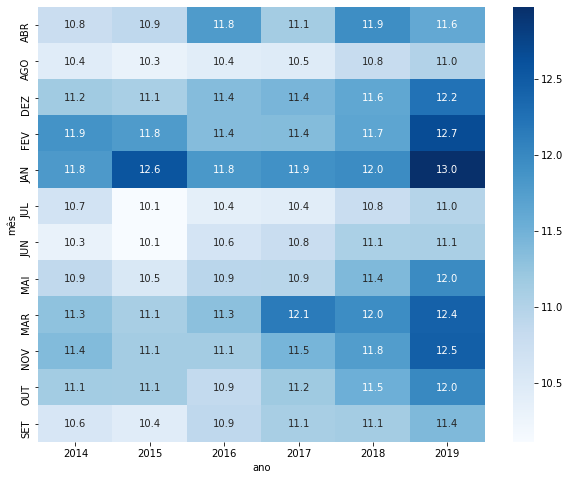

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(consumo,cmap="Blues", annot = True, fmt=".1f") #camp: "YlGnBu"; "Greens"; "Blues"
plt.show()

In [ ]:
# É incômodo ver os meses do ano desordenados

dfe['mês'] = pd.Categorical(dfe['mês'], 
             ordered=True, 
             categories=['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO','SET', 'OUT','NOV','DEZ'])

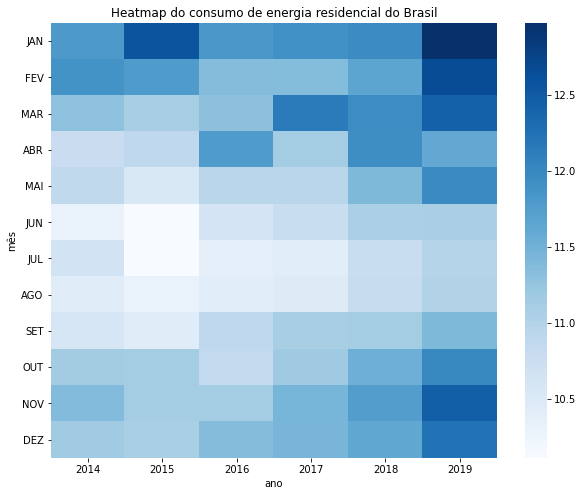

In [ ]:
plt.figure(figsize=(10,8))
consumo1=dfe.pivot("mês", "ano", "consumoRes")

sns.heatmap(consumo1, cmap='Blues')
plt.yticks(rotation=0) 
plt.title("Heatmap do consumo de energia residencial do Brasil")
plt.show()

In [ ]:
# Temperatura máxima em Boston no ano de 2012

link="http://www.orlandoalbarracin.com.br/phyton/boston2012Tmax.xlsx"
dfb=pd.read_excel(link)
dfb.head()

,mês,dia,Temp_max
0,1,1,11.1
1,1,2,10.2
2,1,3,1.7
3,1,4,-2.0
4,1,5,3.9


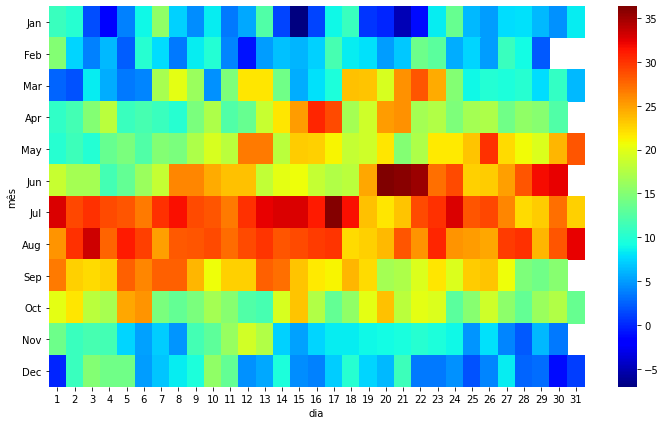

In [ ]:
import matplotlib as mpl #Selecionar as cores pro gráfico de temperatura
cmap=mpl.cm.jet

plt.figure(figsize=(12,7))

Temp=dfb.pivot("mês","dia","Temp_max")
ax=sns.heatmap(Temp, cmap=cmap)
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(rotation=0) 

plt.show()

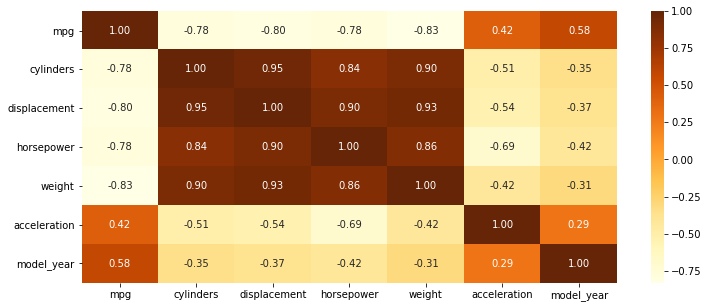

In [ ]:
# Estudar a correlação entre variáveis

df = sns.load_dataset('mpg')
plt.figure(figsize=(12,5))

sns.heatmap(df.corr(),cmap="YlOrBr", annot = True, fmt=".2f");

# Exercícios

### Exercício 1

Considere a base de dados *mpg*.

1. Faça um gráfico adequado para visualizar os pesos médios dos carros das décadas de 70 e 80.

2. Faça um gráfico adequado para visualizar os pesos médios dos carros das décadas de 70 e 80 considerando a origem. 


In [ ]:
df = sns.load_dataset('mpg')


### Exercício 2

Considere a base de dados *'car_crashes'*. 

1. Faça um gráfico adequado para compar o número total de acidentes registrados para os estados de AL, CA e DC. Em qual estado registram-se mais acidentes?

In [ ]:
df = sns.load_dataset('car_crashes')
df.head()

### Exercício 3

Considere a base de dados "Salários de uma companhia".
1. Faça um gráfico adequado para comparar a proporção de empregados de cada Setor. Há algum setor predominante?
2. Um empregado fez um gráfico de pizza para analisar os salários dos empregados. Discuta a qualidade deste gráfico.

In [ ]:
link= "http://www.orlandoalbarracin.com.br/phyton/data2.csv"
dfs=pd.read_csv(link)
dfs.head()


### Exercício 4

Considere a base de dados 'geyser'.

1. Analise por meio de um gráfico adequado se existe, aparentemente, uma relação entre as variáveis *duration* e *waiting*. 
2. Refaça o gráfico anterior para analisar se  o tipo de geyser, isto é, a variável `kind` influência nesta relação. Discuta os resultados

In [ ]:
dfg = sns.load_dataset('geyser')
dfg.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


### Exercício 5

1. Considere a base de dados "Gdp_per_capita"(apresenta algumas variáveis sociais de 133 países em 2017).  Analise por meio de gráficos se há uma relação linear entre a variável "Log PBD per capita" e as demais. 

In [ ]:
link="http://www.orlandoalbarracin.com.br/phyton/Gdp_per_capita.xls"
dfp=pd.read_excel(link)
dfp.head()

### Exercício 6

Analise por meido de um gráfico *heatmaps* as emissões de CO2 dos paises de América nos últimos anos

In [ ]:
link="http://www.orlandoalbarracin.com.br/phyton/CO2emissions.xlsx"
dfc2=pd.read_excel(link)
dfc2.head()

,Country,Year,Annual CO2 emissions
0,Argentina,2010,186.671796
1,Argentina,2011,190.236886
2,Argentina,2012,191.715192
3,Argentina,2013,192.275373
4,Argentina,2014,194.431154
